In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications import MobileNet 

In [4]:
train_folders_directory = 'drive/My Drive/data/train'
test_folders_directory = 'drive/My Drive/data/test'
import os
print(os.listdir(train_folders_directory))

['close', 'open']


In [9]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=50,
        zoom_range=0.10,
        width_shift_range=0.10,
        height_shift_range=0.10,
        shear_range=0.10,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=7
)

valid_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=7
)

Found 12000 images belonging to 2 classes.
Found 2998 images belonging to 2 classes.


In [25]:
def MobileNet():
  base_model = tf.keras.applications.MobileNet(
    dropout=0.01,
    include_top=True,
    weights=None,
    classes=2,
    classifier_activation="softmax")
  MobileNet_model = Sequential()
  MobileNet_model.add(base_model)
  MobileNet_model.compile(loss="categorical_crossentropy", metrics=[metrics.MeanSquaredError(),metrics.AUC(),'accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()], optimizer="adam")
  return MobileNet_model

In [26]:
MobileNet_model = MobileNet()
MobileNet_history = MobileNet_model.fit(train_generator, epochs=50, validation_data=valid_generator, shuffle=True, validation_steps=len(valid_generator),batch_size=32)

Epoch 1/50
94/94 [==============================] - 3571s 38s/step - loss: 0.4405 - mean_squared_error: 0.1392 - auc: 0.8831 - accuracy: 0.8003 - precision: 0.8003 - recall: 0.8003 - val_loss: 1.2585 - val_mean_squared_error: 0.4193 - val_auc: 0.5000 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/50
94/94 [==============================] - 213s 2s/step - loss: 0.2174 - mean_squared_error: 0.0648 - auc: 0.9710 - accuracy: 0.9119 - precision: 0.9119 - recall: 0.9119 - val_loss: 2.4137 - val_mean_squared_error: 0.4920 - val_auc: 0.5000 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 3/50
94/94 [==============================] - 210s 2s/step - loss: 0.1427 - mean_squared_error: 0.0418 - auc: 0.9872 - accuracy: 0.9427 - precision: 0.9427 - recall: 0.9427 - val_loss: 3.2735 - val_mean_squared_error: 0.4986 - val_auc: 0.5000 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 4/50
94/94 [=============================

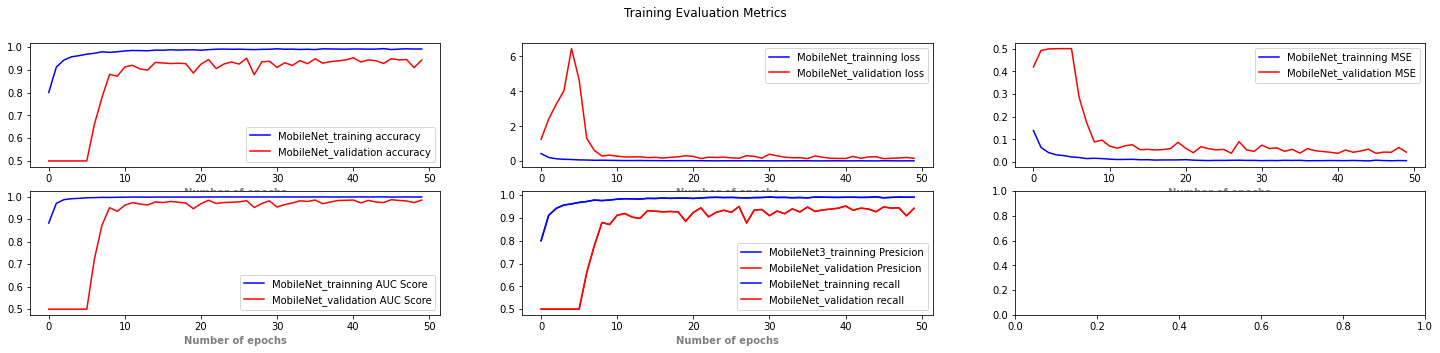

In [27]:
MobileNet_accuracy = MobileNet_history.history['accuracy']
MobileNet_val_accuracy = MobileNet_history.history['val_accuracy']

MobileNet_loss = MobileNet_history.history['loss']
MobileNet_val_loss = MobileNet_history.history['val_loss']

MobileNet_mean_squared_error = MobileNet_history.history['mean_squared_error']
MobileNet_val_mean_squared_error = MobileNet_history.history['val_mean_squared_error']

MobileNet_auc = MobileNet_history.history['auc']
MobileNet_val_auc = MobileNet_history.history['val_auc']

MobileNet_precision = MobileNet_history.history['precision']
MobileNet_val_precision = MobileNet_history.history['val_precision']

MobileNet_recall = MobileNet_history.history['recall']
MobileNet_val_recall = MobileNet_history.history['val_recall']

MobileNet_epochs = range(50)

plt.figure
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 5))

axs[0,0].plot(MobileNet_epochs, MobileNet_accuracy, "b", label="MobileNet_training accuracy")
axs[0,0].plot(MobileNet_epochs, MobileNet_val_accuracy, "r", label="MobileNet_validation accuracy")
axs[0,0].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[0,0].legend()

axs[0,1].plot(MobileNet_epochs, MobileNet_loss, "b", label="MobileNet_trainning loss")
axs[0,1].plot(MobileNet_epochs, MobileNet_val_loss, "r", label="MobileNet_validation loss")
axs[0,1].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[0,1].legend()

axs[0,2].plot(MobileNet_epochs, MobileNet_mean_squared_error, "b", label="MobileNet_trainning MSE")
axs[0,2].plot(MobileNet_epochs, MobileNet_val_mean_squared_error, "r", label="MobileNet_validation MSE")
axs[0,2].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[0,2].legend()

axs[1,0].plot(MobileNet_epochs, MobileNet_auc, "b", label="MobileNet_trainning AUC Score")
axs[1,0].plot(MobileNet_epochs, MobileNet_val_auc, "r", label="MobileNet_validation AUC Score")
axs[1,0].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[1,0].legend()

axs[1,1].plot(MobileNet_epochs, MobileNet_precision, "b", label="MobileNet3_trainning Presicion")
axs[1,1].plot(MobileNet_epochs, MobileNet_val_precision, "r", label="MobileNet_validation Presicion")
axs[1,1].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[1,1].legend()

axs[1,1].plot(MobileNet_epochs, MobileNet_recall, "b", label="MobileNet_trainning recall")
axs[1,1].plot(MobileNet_epochs, MobileNet_val_recall, "r", label="MobileNet_validation recall")
axs[1,1].set_xlabel('Number of epochs',fontsize=10,fontweight='bold',color='Gray')
axs[1,1].legend()

fig.suptitle("Training Evaluation Metrics")
plt.show()


In [28]:
MobileNet_model.save("drive/MyDrive/MobileNet.h5")
MobileNet_model.save("drive/MyDrive/MobileNet.model")

In [29]:
x = tf.keras.models.load_model('drive/MyDrive/MobileNet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(x)
tflmodel = converter.convert()
file = open( 'MobileNet.tflite' , 'wb' ) 
file.write( tflmodel )

12813744